In [275]:
from tools import load
import numpy as np
import matplotlib.pyplot as plt

In [276]:
data = load(to_int=False, line_splitter="")
data = np.array([list(x)  for x  in data])

# next time use y,x not x,y as numpy does :)

# recode if not up start.
y,x = np.where(data == "^")[0][0], np.where(data == "^")[1][0] 
data[data == "."] = 0
data[data == "#"] = 1
#assume free starting field.
data[data == "^"] = 0
data = data.astype(int)

data.sum()

830

In [277]:
def step(data, pos, direction):

    if direction == "L":
        if data[pos[0],pos[1]-1] == 0: 
            pos[1] -= 1
            new_direction = "L"
        else: 
            new_direction = "U"
    elif direction == "R":
        if data[pos[0],pos[1]+1] == 0: 
            pos[1] +=1
            new_direction = "R"
        else: 
            new_direction = "D"

    elif direction == "U":
        if data[pos[0]-1,pos[1]] == 0: 
            pos[0] -=1
            new_direction = "U"
        else: 
            new_direction = "R"
    elif direction == "D":
        if data[pos[0]+1,pos[1]] == 0: 
            pos[0] +=1
            new_direction = "D"
        else: 
            new_direction = "L"
    return pos, new_direction

In [278]:
def check_out(dims,pos, direction):
    if direction == "L":
        if pos[1] == 0:
            return True
    elif direction == "R":
        if pos[1] == (dims[1]-1):
            return True
    elif direction == "U":
        if pos[0] == 0:
            return True
    elif direction == "D":
        if pos[0] == (dims[0]-1):
            return True
    else: 
        return False

In [279]:
# prepped for b
def walk (data, position, direction= "U"):
        memory = np.zeros(data.shape).astype(str)
        memory[:, :] = ""
        memory[y][x] += direction
        # potentially a little inefficient :)
        for n in range (1000000):
                position, direction = step(data, position, direction)
                if direction in memory[position[0],position[1]]:
                    memory[position[0],position[1]] +=direction
                    return memory, True
                else:
                    memory[position[0],position[1]] +=direction
                if check_out(data.shape, position, direction): 
                    break
        
        assert n != (1000000-1), "Failed to find solution"
        return memory,False

In [280]:
res1, cycle = walk(data,[y,x],"U")
res1[res1 != ""] = 1
res1[res1 == ""] = 0
res1 = res1.astype(int)
(res1> 0).sum()

5269

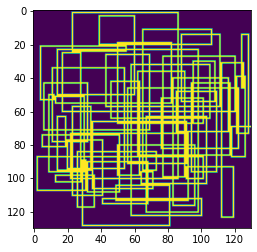

In [281]:
plt.imshow(res1.astype(int))

In [282]:
#b
# we need a memory of positions + direction
solution = []
# run through all possible obstacle positions. 
for i_y in range(data.shape[0]):
    for i_x in range(data.shape[1]):
        if data[i_y][i_x] == 1:
            pass # not mecessary
        elif (x == i_x) and (y == i_y):
            pass # illegal
        elif res1[i_y][i_x] == 0: # not on path so will have no effect 
            pass
        else: 
            altered = data.copy()
            altered[i_y][i_x] = 1
            res, cycle = walk(altered,[y,x],"U")
            if cycle: 
                solution.append((i_x,i_y))

In [285]:
len(solution)

1957